<a href="https://colab.research.google.com/github/ilEnzio/DS-Unit-2-Kaggle-Challenge/blob/master/module3-cross-validation/ERLE_GRANGERII_DS18_LS_DS_223_assignment_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 3*

---

# Cross-Validation


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


**You can't just copy** from the lesson notebook to this assignment.

- Because the lesson was **regression**, but the assignment is **classification.**
- Because the lesson used [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html), which doesn't work as-is for _multi-class_ classification.

So you will have to adapt the example, which is good real-world practice.

1. Use a model for classification, such as [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Use hyperparameters that match the classifier, such as `randomforestclassifier__ ...`
3. Use a metric for classification, such as [`scoring='accuracy'`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)
4. If you’re doing a multi-class classification problem — such as whether a waterpump is functional, functional needs repair, or nonfunctional — then use a categorical encoding that works for multi-class classification, such as [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) (not [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html))



## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [5]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import pandas as pd

# special sauce for custom method :) 
from collections import namedtuple

from sklearn.model_selection import train_test_split



# ML models
from sklearn.linear_model import LinearRegression # old reliable model, for continous
from sklearn.linear_model import Ridge # RidgeRegression to guard against overfit
from sklearn.linear_model import LogisticRegression # used to predict categorical vectors
from sklearn.tree import DecisionTreeClassifier # decision Tree for classification problems

from sklearn.ensemble import RandomForestClassifier # group of trees to guard against variance

from sklearn.model_selection import GridSearchCV

# Metric accessing functions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Transformers
from category_encoders import OneHotEncoder # splits cat variable 
from category_encoders import OrdinalEncoder # encode cats into ordered numbers
import category_encoders as ce

from sklearn.feature_selection import SelectKBest # selects highest correlating features
from sklearn.impute import SimpleImputer

# Lets us combine the steps for cleaner code
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

In [7]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

## Start to build my Wrangle Function

#### construction year - change 0 to nan
#### handle latitud and longitude function


In [8]:
def wrangle_water_pump_comp(df):
  year = ["construction_year"]
  for x in year:
    df[x] = df[x].replace(0, np.nan)

  # Replace the funky latitute measurements with 0
  df['latitude'] = df['latitude'].replace(-2e-08, 0)

  # Replace all lon and lat 0s with Nan
  cols_with_zeros = ['longitude', 'latitude']
  for col in cols_with_zeros:
     df[col] = df[col].replace(0, np.nan)

  # Deal with an outlier
  df = df.drop(index=10812)
  
  return df

In [9]:
# Make a function to create Matrix and Target pre validation split
def create_Xmatrix_ytarget(training_df):
  y_target = training_df['status_group']
  X_matrix = training_df.drop('status_group', axis=1)
  return (X_matrix, y_target)


## Submission export Function

In [10]:
def get_sub_csv(prediction, name_string):
  # copy the sample and replace the target vector
  # with the prediction array
  temp_df = sample_submission.copy()
  temp_df["status_group"] = prediction

  temp_df.to_csv(name_string+".csv", index= False)


In [11]:
train_orginal = train.copy()

In [12]:
train = wrangle_water_pump_comp(train)
test = wrangle_water_pump_comp(test)

In [13]:
train_df =  train.copy()

## EDA and Feature Engineering

### I left off with these features: 

    = 'amount_tsh', "construction_year",
            'quantity','extraction_type',
             'region',"gps_height", "population"
             "latitude"

but I should now have longitude.  

In [14]:
# lets model with longitude 

In [15]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

# Best Model to date
## **tree model_05 - forest vers** 

    = 'amount_tsh', "construction_year",
                'quantity','extraction_type',
                 'region',"gps_height", "population"
                 "latitude", 'longitude'

**Max Depth**  = 23

**min_samples_split**=4

This is a random forest tree .  
it recieved a Accuracy Score of :
* Training Accuracy: 0.9323863636363636
* **Validation Accuracy: 0.8000841750841751**

I feel this model is getting a little bit overfit.  I may scale back the depth on the next one.  

In [16]:
column_list_rn5 =  ['amount_tsh', "construction_year",
                'quantity','extraction_type',"gps_height",
                 'region', "population", 'latitude', 'longitude',
                  'status_group']

In [17]:
train_df = train[column_list_rn5]
train_df.shape

(59399, 10)

In [18]:
X_matrix, y_target = create_Xmatrix_ytarget(train_df)
print(X_matrix.shape)
print(y_target.shape)

(59399, 9)
(59399,)


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_matrix, y_target,
                                                  test_size=.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(47519, 9)
(11880, 9)
(47519,)
(11880,)


In [21]:
tree_f_model_05 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(criterion="entropy", max_depth=23,
                           min_samples_split=4, random_state=42,
                           n_estimators=305))

In [22]:
tree_f_model_05.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['quantity', 'extraction_type', 'region'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomf...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=23, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                          

In [23]:
print(f"Training Accuracy: {tree_f_model_05.score(X_train, y_train)}")
print(f"Validation Accuracy: {tree_f_model_05.score(X_val, y_val)}")


Training Accuracy: 0.9335634167385677
Validation Accuracy: 0.797053872053872


In [24]:
classifier = tree_f_model_05.named_steps['randomforestclassifier']
feature_names = tree_f_model_05.named_steps['onehotencoder'].feature_names

In [25]:
import matplotlib.pyplot as plt

feat_importances = classifier.feature_importances_
importances = pd.Series(feat_importances, index=feature_names)

plt.figure(figsize=(10,30))
importances.sort_values().plot(kind='barh');

## Prediction and Saving 

In [47]:
column_list_rn5b =  ['amount_tsh', "construction_year",
                'quantity','extraction_type',"gps_height",
                 'region', "population", 'latitude', 'longitude']

In [48]:
test_tree_f_05 = test[column_list_rn5b]
# test_tree_02.head()

In [52]:
y_pred_tree_f_model_05 = best_model.predict(test_tree_f_05)


In [53]:
get_sub_csv(y_pred_tree_f_model_05, "sub_tree_f_05best")

ValueError: ignored

## X Matrix stuff Feature Engineering



    = 'amount_tsh', "construction_year",
            'quantity','extraction_type',
             'region',"gps_height", "population"
             "latitude"

but I should now have longitude.  

In [ ]:
# lets model with longitude 

In [ ]:
train.columns

## **tree model_11 - forest vers** 

    = 'amount_tsh', "construction_year",
                'quantity','extraction_type',
                 'region',"gps_height", "population"
                 "latitude", 'longitude'

**Max Depth**  = 23

**min_samples_split**=4

This is a random forest tree .  
it recieved a Accuracy Score of :
* Training Accuracy: 0.9323863636363636
* **Validation Accuracy: 0.8000841750841751**

I feel this model is getting a little bit overfit.  I may scale back the depth on the next one.  

In [27]:
column_list_rn11 =  ['amount_tsh', "construction_year",
                'quantity','extraction_type',"gps_height",
                 'region', "population", 'latitude', 'longitude',
                  'status_group']

In [28]:
train_df = train[column_list_rn11]
train_df.shape

(59399, 10)

In [29]:
X_matrix, y_target = create_Xmatrix_ytarget(train_df)
print(X_matrix.shape)
print(y_target.shape)

(59399, 9)
(59399,)


In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_matrix, y_target,
                                                  test_size=.2, random_state=42)

In [31]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(47519, 9)
(11880, 9)
(47519,)
(11880,)


In [38]:
tree_f_model_11 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(criterion="entropy", max_depth=23,
                           min_samples_split=4, random_state=42,
                           n_estimators=305))

In [42]:
param_grid = [
             { "randomforestclassifier__max_depth" : [12, 15, 18, 20, 24],
              "randomforestclassifier__min_samples_split" : [2, 4, 10, 20] 
             }
]
# forest_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(tree_f_model_11, param_grid, cv = 5,
                           scoring="accuracy",
                           return_train_score=True,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 45.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=None,
                                                       drop_invariant=False,
                                                       handle_missing='value',
                                                       handle_unknown='value',
                                                       mapping=None,
                                                       return_df=True,
                                                       verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
          

In [ ]:
# tree_f_model_11.fit(X_train, y_train)

In [ ]:
# print(f"Training Accuracy: {tree_f_model_11.score(X_train, y_train)}")
# print(f"Validation Accuracy: {tree_f_model_11.score(X_val, y_val)}")


In [43]:
print('Best hyperparameters', grid_search.best_params_)


Best hyperparameters {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_split': 4}


In [46]:
best_model = grid_search.best_estimator_
best_model

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['quantity', 'extraction_type', 'region'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'quantity',
                                          'data_type': dtype('O'),
                                          'mapping': insufficient    1
seasonal        2
enough          3
dry             4
unknown         5
NaN            -2
dtype: int64},
                                         {'col': 'extraction_type',
                                          'data_type': dtype('O'),
                                          'mapping':...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=20, max_features='auto',
        

In [ ]:
classifier = tree_f_model_11.named_steps['randomforestclassifier']
feature_names = tree_f_model_11.named_steps['ordinalencoder'].feature_names

In [ ]:
import matplotlib.pyplot as plt

feat_importances = classifier.feature_importances_
importances = pd.Series(feat_importances, index=feature_names)

plt.figure(figsize=(10,30))
importances.sort_values().plot(kind='barh');

## **Testing upsampling**

In [54]:
train.status_group.value_counts()

functional                 32258
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [55]:
df_majority = train[train.status_group == "functional"]
df_minority = train[train.status_group == "non functional"]
df_super_min = train[train.status_group == "functional needs repair"]

In [56]:
df_majority.shape

(32258, 41)

In [57]:
df_minority.shape

(22824, 41)

In [58]:
from sklearn.utils import resample


In [59]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples =32259,
                                 random_state=42)

In [60]:
df_minority_upsampled.shape

(32259, 41)

In [61]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.shape

(64517, 41)

In [62]:
df_supMin_upsampled = resample(df_super_min, 
                                 replace=True,
                                 n_samples =22259,
                                 random_state=42)

In [63]:
df_supMin_upsampled.shape

(22259, 41)

In [64]:
df_supMin2_upsampled = resample(df_super_min, 
                                 replace=True,
                                 n_samples =12259,
                                 random_state=42)

In [65]:
df_upsampled2 = pd.concat([df_upsampled, df_supMin_upsampled])
df_upsampled2.shape

(86776, 41)

In [66]:
df_upsampled3 = pd.concat([df_upsampled, df_supMin2_upsampled])
df_upsampled3.shape


(76776, 41)


## **tree model_12(9) - forest vers** 
## Upsampled
    = 'amount_tsh', "construction_year",
                'quantity','extraction_type',
                 'region',"gps_height", "population"
                 "latitude", 'longitude','source',
                  'source_type', 'source_class'

**Max Depth**  = 26

**min_samples_split**=7

This is a random forest tree .  
it recieved a Accuracy Score of :

Training Accuracy: 0.8510610816186823

**Validation Accuracy: 0.8150960942343459**


In [67]:
column_list_rn12 =  ['amount_tsh', "construction_year",
                'quantity','extraction_type',
                 'region',"gps_height", "population",
                 "latitude", 'longitude',
                  'waterpoint_type',
                  'status_group']

In [68]:
train_df =  train.copy()

In [70]:
train_df = df_upsampled2[column_list_rn12]
train_df.shape

(86776, 11)

In [71]:
X_matrix, y_target = create_Xmatrix_ytarget(train_df)
print(X_matrix.shape)
print(y_target.shape)

(86776, 10)
(86776,)


In [72]:
X_train, X_val, y_train, y_val = train_test_split(X_matrix, y_target,
                                                  test_size=.2, random_state=42)

In [73]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(69420, 10)
(17356, 10)
(69420,)
(17356,)


In [74]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = [
#              {"n_estimators": [100,150,200], "max_depth" : [12, 15, 20, 26, 30],
#               "min_samples_split" : [2, 4, 10]}
# ]
# forest_classifier = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(forest_classifier, param_grid, cv = 5,
#                            scoring="accuracy"
#                            return_train_score=True)
# grid_search.fit(X_train,y_train)


In [ ]:
# I need to stratify the target
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     stratify=y, 
#                                                     test_size=0.25)

In [75]:
tree_f_model_12 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestClassifier(criterion="entropy", max_depth=20,
                            random_state=42, min_samples_split=10,
                           n_estimators=305,))

In [76]:
param_grid = [
             { "randomforestclassifier__max_depth" : [12, 15, 20, 26, 30],
              "randomforestclassifier__min_samples_split" : [2, 4,7, 10, 20] 
             }
]
# forest_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(tree_f_model_12, param_grid, cv = 2,
                           scoring="accuracy",
                           return_train_score=True,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 16.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('onehotencoder',
                                        OneHotEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=True,
                                                      verbose=0)),
                                       ('simpleimputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
            

In [ ]:
tree_f_model_12.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['quantity', 'extraction_type', 'region',
                                     'waterpoint_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               ver...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
     

In [ ]:
# print(f"Training Accuracy: {tree_f_model_12.score(X_train, y_train)}")
# print(f"Validation Accuracy: {tree_f_model_12.score(X_val, y_val)}")


Training Accuracy: 0.904265279958514
Validation Accuracy: 0.8411500345701775


In [77]:
print('Best hyperparameters', grid_search.best_params_)


Best hyperparameters {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_split': 2}


In [88]:
best_model_02 = grid_search.best_estimator_
best_model_02

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['quantity', 'extraction_type', 'region',
                                     'waterpoint_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               ver...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=30, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
     

In [ ]:
y_val.shape

(17356,)

In [ ]:
classifier = tree_f_model_09.named_steps['randomforestclassifier']
feature_names = tree_f_model_09.named_steps['onehotencoder'].feature_names

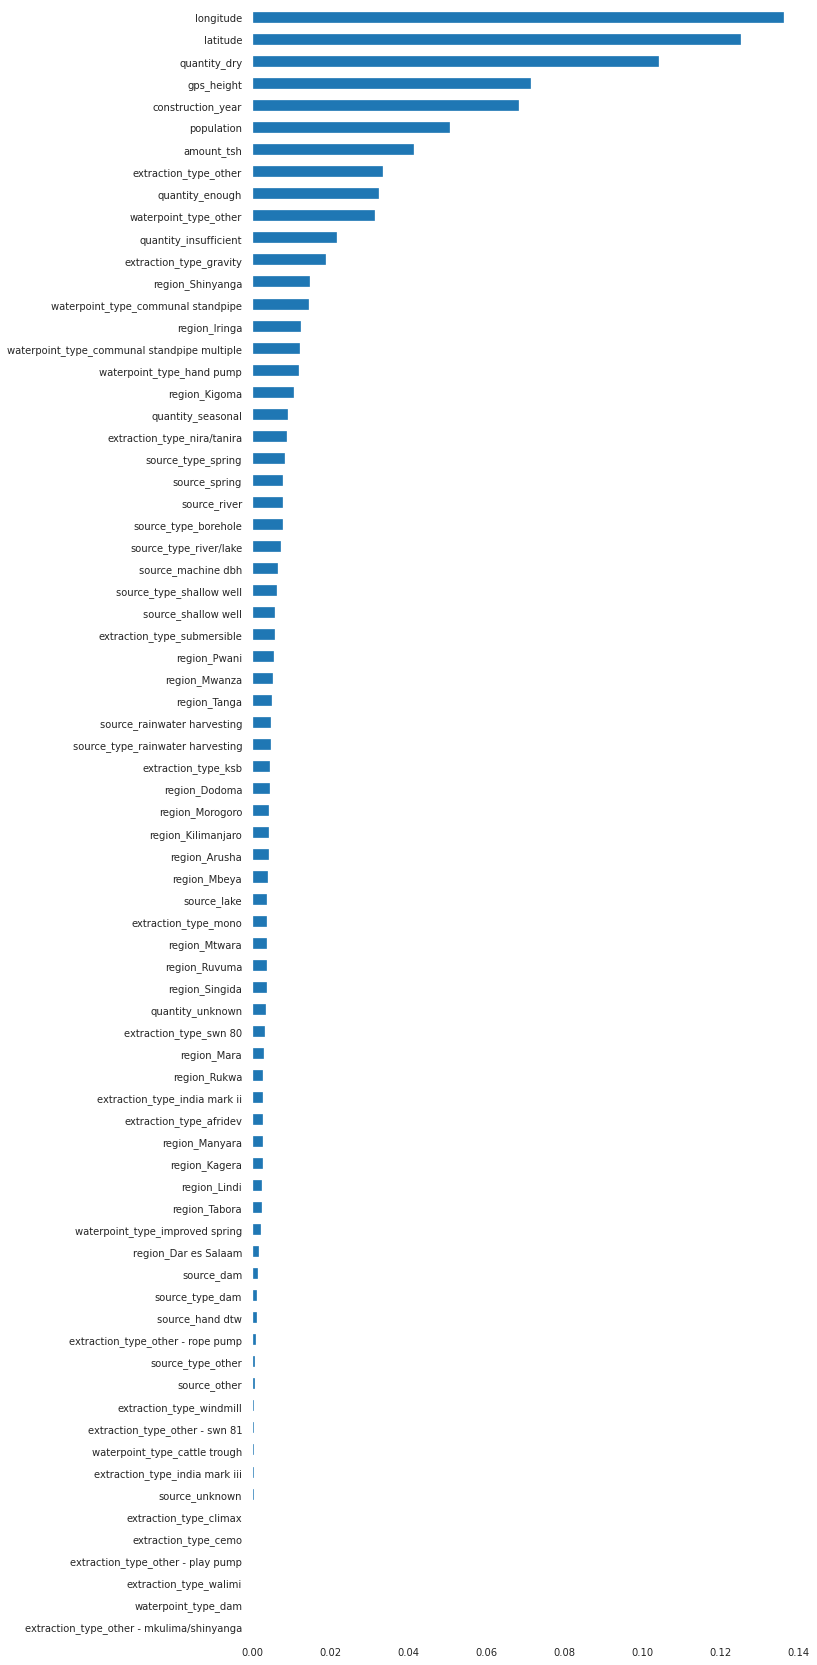

In [ ]:
import matplotlib.pyplot as plt

feat_importances = classifier.feature_importances_
importances = pd.Series(feat_importances, index=feature_names)

plt.figure(figsize=(10,30))
importances.sort_values().plot(kind='barh');

In [85]:
column_list_rn12b =  ['amount_tsh', "construction_year",
                'quantity','extraction_type',
                 'region',"gps_height", "population",
                 "latitude", 'longitude',
                  'waterpoint_type']

In [86]:
test_tree_f_12 = test[column_list_rn12b]
# test_tree_02.head()

In [89]:
y_pred_tree_f_model_12 = best_model_02.predict(test_tree_f_12)


In [90]:
get_sub_csv(y_pred_tree_f_model_12, "sub_tree_f_12e305")

ValueError: ignored